## Rent and Population Comparisons for California Counties after 2015
## Project 1
### Group 4

##### Vincent Passanisi, Ana Gonzalez, David Dixon, Daniel Corral, Cristian Jung, Quoc Tran
Due November 30, 2022

---


In [1]:
%matplotlib widget

In [2]:
# Import the modules needed for this notebook.

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
# Import California rent data from Zillow for 2015 to 2019
# Set the index to 'StateName'

path = 'County_zori_sm_sa_month.csv'
csvfile = pd.read_csv(path, encoding='utf-8')
rents = pd.DataFrame(csvfile)
rents.set_index(rents['StateName'])


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,3/31/2015,...,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022
StateName,,,,,,,,,,,,,,,,,,,,,
CA,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,1926.991658,...,2729.390246,2755.513640,2779.814053,2812.161093,2842.625892,2861.876621,2873.416820,2883.985603,2897.074676,2903.093932
IL,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,1474.168496,...,1784.075380,1795.926466,1807.350431,1816.939486,1831.220511,1840.614502,1853.735489,1862.268681,1873.774721,1887.327681
TX,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,1265.704634,...,1538.360127,1548.135905,1552.104357,1559.552586,1566.809638,1577.283575,1584.804241,1592.786510,1595.325585,1595.095861
AZ,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,1016.003857,...,1900.456957,1907.285752,1916.910106,1926.139846,1938.348507,1944.165765,1947.966188,1945.259798,1940.447973,1934.658621
CA,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,1856.685365,...,2828.215924,2852.863786,2886.838216,2944.770447,2986.267820,3025.931781,3058.815591,3091.576010,3103.283044,3105.048761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,3282,1981,Manassas Park City,county,VA,VA,"Washington-Arlington-Alexandria, DC-VA-MD-WV",51,685,NaN,...,1799.512049,1791.953346,1808.059020,1806.024668,1823.412120,1865.617601,1889.997462,1879.960382,1869.872064,1852.875000
SD,777,2072,Union County,county,SD,SD,"Sioux City, IA-NE-SD",46,127,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1507.000000
CO,528,2075,Grand County,county,CO,CO,NaN,8,49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2305.217495,2450.000000


In [4]:
# Selecting only the California counties and dropping the unnecessary columns

cal_rents = rents.groupby('StateName')
county_rents = cal_rents.get_group('CA')
county_rents_df = pd.DataFrame(county_rents)
county_rents_chart = county_rents_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS'])
county_rents_chart.head()



,RegionName,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,...,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022
0,Los Angeles County,1926.991658,1938.786435,1946.578305,1956.065493,1967.670532,1981.210212,1993.703092,2003.165124,2018.872077,...,2729.390246,2755.513640,2779.814053,2812.161093,2842.625892,2861.876621,2873.416820,2883.985603,2897.074676,2903.093932
4,San Diego County,1856.685365,1867.381695,1869.745495,1873.392157,1879.740423,1890.184201,1903.705846,1912.147995,1923.227900,...,2828.215924,2852.863786,2886.838216,2944.770447,2986.267820,3025.931781,3058.815591,3091.576010,3103.283044,3105.048761
5,Orange County,2052.889792,2060.483520,2067.330181,2066.518918,2072.299061,2078.178906,2089.502867,2097.021556,2112.965660,...,2992.109527,3012.521461,3045.851889,3073.644785,3099.087148,3116.758818,3135.532385,3145.326093,3142.566938,3133.555281
9,Riverside County,1466.764157,1478.829383,1484.176391,1484.616665,1488.070030,1494.840120,1508.634337,1514.023309,1524.281208,...,2481.639629,2491.110014,2533.559052,2560.158930,2587.892966,2599.390237,2611.373135,2618.506622,2620.565363,2610.557825
13,San Bernardino County,1474.114843,1483.571327,1488.001663,1494.213734,1491.235435,1498.391606,1507.474262,1514.627143,1519.301225,...,2409.155171,2459.054027,2476.567057,2505.424722,2522.184158,2541.007139,2556.865037,2551.005527,2554.444827,2542.773081


In [5]:
# Merge Zillow data frame with data frame containing counties sorted by region.

counties = pd.read_csv('county-list.csv', encoding='utf-8')
counties_df = pd.DataFrame(counties)
counties_df.head()
rents_merge = pd.merge(counties_df, county_rents_chart, on='RegionName')
rents_merge.head()


,county_number,RegionName,region,location1,location2,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022
0,1,Alameda County,3,Coastal,North,2182.299239,2217.009463,2230.838872,2247.717665,2270.310716,...,2847.930874,2878.492206,2882.271674,2904.712241,2913.684669,2928.747853,2942.828461,2945.639384,2937.671944,2923.818645
1,4,Butte County,1,Inland,North,1069.719953,1080.960072,1080.767917,1092.625149,1094.115940,...,1552.230743,1592.145993,1585.802755,1588.238128,1579.872675,1593.358685,1616.010602,1636.895161,1650.386620,1658.990885
2,7,Contra Costa County,3,Coastal,North,2040.831794,2049.210580,2050.964252,2072.833093,2099.444774,...,2895.798519,2900.609775,2927.044655,2953.116411,2970.376588,2968.728953,2976.627825,2992.198368,2997.405022,3000.239415
3,9,El Dorado County,1,Inland,North,1467.777371,1468.740257,1471.753747,1493.299819,1494.246987,...,2463.494868,2474.340483,2536.006338,2565.991732,2632.916365,2645.993169,2685.661363,2667.092987,2648.263215,2624.781490
4,10,Fresno County,6,Inland,Central,1174.055963,1179.137937,1181.191081,1186.714245,1193.019788,...,1909.455456,1906.734197,1921.480207,1936.924833,1960.681179,1973.472627,1966.512752,1967.173844,1970.725947,2001.487963


In [6]:
# Clean up data frame by dropping any columns and rows with missing data.

clean_rents = rents_merge.set_index('RegionName', drop=True)
clean_column_rents = rents_merge.drop(['county_number', 'region'],axis=1)
clean_row_rents = clean_column_rents.dropna(axis=0, how='any')
clean_row_rents
clean_rents_copy = clean_row_rents.copy()
clean_rents_copy = clean_rents_copy.set_index(['RegionName', 'location1', 'location2'], drop=True)


In [7]:
# Transpose data frame to get the dates in a column.
# Split the date string to isolate the year, and loop to create a new column with just the year.
# Group the data by year and get the mean value.
# Transpose the data frame to create a list of counties with mean rent values for each year from 2015 to 2022

clean_rents_tr = clean_rents_copy.transpose()
clean_reset = clean_rents_tr.reset_index()
clean_date_split = clean_reset['index'].str.split(pat='/')
rent_year2 = []
clean_date_split
for x in clean_date_split:
    rent_year2.append(x[2])

clean_rents_tr['Year'] = rent_year2
clean_rents_year = clean_rents_tr.groupby(['Year']).mean()
clean_rents = clean_rents_year.transpose()
clean_rents.head()

,,Year,2015,2016,2017,2018,2019,2020,2021,2022
RegionName,location1,location2,,,,,,,,
Alameda County,Coastal,North,2285.488453,2452.963257,2545.881604,2637.459626,2712.040715,2716.006398,2725.711437,2910.579795
Butte County,Inland,North,1091.759318,1140.744231,1193.251613,1246.380311,1358.946796,1406.797190,1499.705445,1605.393225
Contra Costa County,Coastal,North,2104.314033,2251.722187,2364.742389,2473.581423,2567.960957,2625.929547,2770.528889,2958.214553
El Dorado County,Inland,North,1504.651899,1619.848433,1740.351733,1841.230582,1929.313718,2040.713924,2391.103650,2594.454201
Fresno County,Inland,Central,1188.070153,1231.832127,1299.394175,1369.643033,1458.389672,1536.802624,1790.244741,1951.464900


In [8]:
# Calculate the percent change in rent for each county from 2015 to 2019 and add as a column

rent_percent_change = ((clean_rents['2019']) - (clean_rents['2015'])) / ((clean_rents['2019']))
clean_rents['rent change 2015-2019'] = rent_percent_change
clean_rents.head()


,,Year,2015,2016,2017,2018,2019,2020,2021,2022,rent change 2015-2019
RegionName,location1,location2,,,,,,,,,
Alameda County,Coastal,North,2285.488453,2452.963257,2545.881604,2637.459626,2712.040715,2716.006398,2725.711437,2910.579795,0.157281
Butte County,Inland,North,1091.759318,1140.744231,1193.251613,1246.380311,1358.946796,1406.797190,1499.705445,1605.393225,0.196614
Contra Costa County,Coastal,North,2104.314033,2251.722187,2364.742389,2473.581423,2567.960957,2625.929547,2770.528889,2958.214553,0.180551
El Dorado County,Inland,North,1504.651899,1619.848433,1740.351733,1841.230582,1929.313718,2040.713924,2391.103650,2594.454201,0.220110
Fresno County,Inland,Central,1188.070153,1231.832127,1299.394175,1369.643033,1458.389672,1536.802624,1790.244741,1951.464900,0.185355


In [9]:
# Import Cristian's data frame of California population by county.
# Calculate the percent change in population between 2015 and 2019 to match Zillow data
# Merge Cristian's .csv with mine.

merged_pop = pd.read_csv('merged_population2.csv')
pop_percent_change = ((merged_pop['2019']) - (merged_pop['2015'])) / ((merged_pop['2019']))
merged_pop['pop change 2015-2019'] = pop_percent_change
merged_pop.rename(columns = {'Unnamed: 1':'RegionName'}, inplace=True)
percent_change_df = pd.merge(clean_rents, merged_pop, on='RegionName')
change_df = percent_change_df.rename(columns= {'location1_x':'location1',
                                                'location2_x':'location2',
                                                'rent change 2015-2019_y':'rent change 2015-2019'
})
change_df.head()

,RegionName,2015_x,2016_x,2017_x,2018_x,2019_x,2020,2021,2022,rent change 2015-2019,...,2012,2013,2014,2015_y,2016_y,2017_y,2018_y,2019_y,% change 2010-2019,pop change 2015-2019
0,Alameda County,2285.488453,2452.963257,2545.881604,2637.459626,2712.040715,2716.006398,2725.711437,2910.579795,0.157281,...,1553764,1579593,1607792,1634538,1650950,1660196,1666756,1671329,0.094741,0.022013
1,Butte County,1091.759318,1140.744231,1193.251613,1246.380311,1358.946796,1406.797190,1499.705445,1605.393225,0.196614,...,220869,221641,223516,224631,226231,228696,230339,219186,-0.003481,-0.024842
2,Contra Costa County,2104.314033,2251.722187,2364.742389,2473.581423,2567.960957,2625.929547,2770.528889,2958.214553,0.180551,...,1077548,1093401,1108876,1124405,1137268,1145535,1150519,1153526,0.087545,0.025245
3,El Dorado County,1504.651899,1619.848433,1740.351733,1841.230582,1929.313718,2040.713924,2391.103650,2594.454201,0.220110,...,180575,181481,183108,184569,185976,188679,190746,192843,0.060707,0.042905
4,Fresno County,1188.070153,1231.832127,1299.394175,1369.643033,1458.389672,1536.802624,1790.244741,1951.464900,0.185355,...,945045,951514,960567,969488,976830,985238,991950,999101,0.067122,0.029640


In [10]:
# Reduce dataframe to select only those columns to be charted.

change_df2 = change_df[['location1', 'location2', 'RegionName', 'rent change 2015-2019', 'pop change 2015-2019', '2019_y']]
rent = change_df2['rent change 2015-2019'] * 100
pop = change_df2['pop change 2015-2019'] * 100
change_df2['2019_y'].astype(float)
change_df2.head()


,location1,location2,RegionName,rent change 2015-2019,pop change 2015-2019,2019_y
0,Coastal,North,Alameda County,0.157281,0.022013,1671329
1,Inland,North,Butte County,0.196614,-0.024842,219186
2,Coastal,North,Contra Costa County,0.180551,0.025245,1153526
3,Inland,North,El Dorado County,0.220110,0.042905,192843
4,Inland,Central,Fresno County,0.185355,0.029640,999101


### Cal Counties % change rent v. population 2015 to 2019

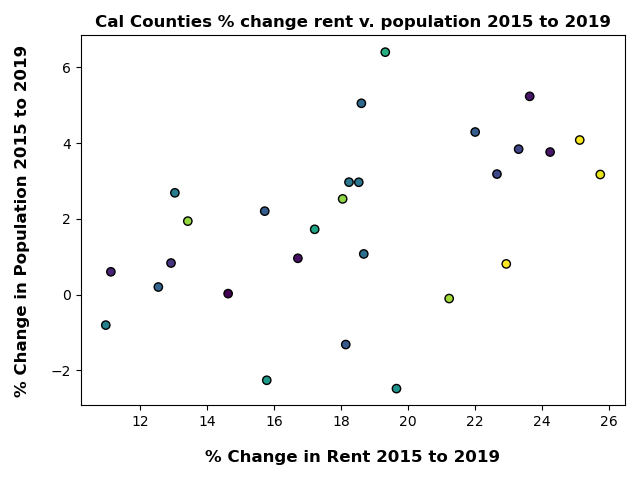

In [11]:
# Create scatter plot charge showing % change in population by % change in rent for 2015 to 2019

N = len(change_df2)
colors = np.random.rand(N)
font = {'weight': 'bold', 'size': '12'}

plt.figure(1)
plt.subplot(111)
plt.ticklabel_format(style='plain')
plt.title('Cal Counties % change rent v. population 2015 to 2019', fontdict=font)
plt.xlabel('% Change in Rent 2015 to 2019', labelpad=15, fontdict=font)
plt.ylabel('% Change in Population 2015 to 2019', labelpad=15, fontdict=font)
plt.scatter(change_df2['rent change 2015-2019'] * 100, change_df2['pop change 2015-2019'] * 100, c=colors, edgecolors='black')
plt.tight_layout()
plt.show()

### Cal Counties % change rent v. population 2015 to 2019

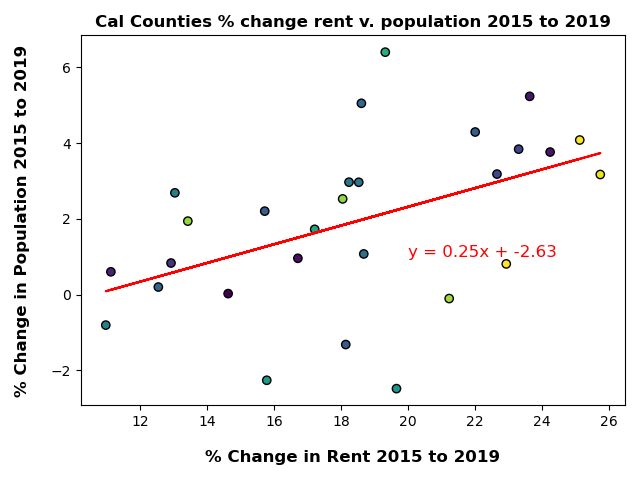

The r-value is 0.48


In [12]:
# Calculate the r-value and plot on the same scatter chart to see if there is a correlation between the two values.

slope, inter, rvalue, pvalue, stderr = st.linregress(change_df2['rent change 2015-2019'] * 100, change_df2['pop change 2015-2019'] * 100)
regress_values = change_df2['rent change 2015-2019'] * 100 * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.figure(2)
plt.subplot(111)
plt.ticklabel_format(style='plain')
plt.title('Cal Counties % change rent v. population 2015 to 2019', fontdict=font)
plt.xlabel('% Change in Rent 2015 to 2019', labelpad=15, fontdict=font)
plt.ylabel('% Change in Population 2015 to 2019', labelpad=15, fontdict=font)
plt.scatter(change_df2['rent change 2015-2019'] * 100, change_df2['pop change 2015-2019'] * 100, c=colors, edgecolors='black')
plt.plot(change_df2['rent change 2015-2019'] * 100, regress_values,'r-')
plt.annotate(line_eq, (20, 1), fontsize=12, color="red")
plt.tight_layout()
plt.show()
print(f'The r-value is {round(rvalue,2)}')

In [13]:
# Group the rent data by region
    # Group by Inland/Coastal
    # Group by North/Central/South
# Get the mean of each

rents_east_west = clean_row_rents.groupby('location1')
rents_north_south = clean_row_rents.groupby('location2')
coastal = rents_east_west.get_group('Coastal')
inland = rents_east_west.get_group('Inland')

avg_rents_east_west = rents_east_west.mean()
avg_rents_north_south = rents_north_south.mean()
avg_rents_north_south


,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,...,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022
location2,,,,,,,,,,,,,,,,,,,,,
Central,1421.149708,1435.391841,1440.380078,1427.968793,1436.540699,1445.463010,1469.959863,1490.607433,1497.225662,1496.309606,...,2233.605077,2236.486330,2249.383484,2265.709691,2316.463467,2341.692961,2366.198018,2360.239964,2367.275866,2378.616983
North,1777.240364,1780.219229,1790.032744,1797.896404,1814.402409,1829.932740,1845.413310,1861.385950,1868.694005,1879.620999,...,2578.900387,2594.441642,2617.952096,2639.403155,2659.612832,2668.480844,2677.402078,2683.278663,2686.730153,2685.336699
Southern,1814.603184,1819.444355,1830.517747,1832.382369,1839.888864,1846.232278,1857.354326,1870.024312,1881.757333,1890.158547,...,2831.329814,2858.090011,2882.114286,2930.046305,2958.731415,2986.640198,2993.746627,3005.474117,3006.704337,3002.523248


In [14]:
# Transpose the data frame in order to group the data by year for Coastal/Inland chart

trans_avg_rents = avg_rents_east_west.transpose()
trans_reset = trans_avg_rents.reset_index()
date_split = trans_reset['index'].str.split(pat='/')
rent_year = []
for x in date_split:
    rent_year.append(x[2])
new_df = pd.DataFrame([rent_year, trans_avg_rents['Coastal'], trans_avg_rents['Inland']])
new_df_tran = new_df.transpose().astype(int)
rents_chart_df = new_df_tran.rename(columns= {0: 'Year',
                                              1: 'Coastal',
                                              2: 'Inland'
 })
rents_chart_df.dtypes
rents_chart_east_west = rents_chart_df.groupby(rents_chart_df['Year']).mean()
rents_chart_east_west


,Coastal,Inland
Year,,
2015,2156.400000,1309.600000
2016,2274.000000,1386.500000
2017,2376.333333,1478.333333
2018,2486.166667,1563.500000
2019,2572.416667,1649.750000
2020,2616.500000,1734.000000
2021,2775.833333,1971.833333
2022,3066.400000,2173.500000


In [15]:
# Transpose the data frame in order to group the data by year for North/Central/South chart

trans_avg_rents2 = avg_rents_north_south.transpose()
trans_reset2 = trans_avg_rents2.reset_index()
date_split2 = trans_reset2['index'].str.split(pat='/')
rent_year2 = []
for y in date_split2:
    rent_year2.append(y[2])
new_df2 = pd.DataFrame([rent_year2, trans_avg_rents2['Central'], trans_avg_rents2['North'], trans_avg_rents2['Southern']])
new_df_tran2 = new_df2.transpose().astype(int)
rents_chart_nor = new_df_tran2.rename(columns= {0: 'Year',
                                              1: 'Central',
                                              2: 'Northern',
                                              3: 'Southern'
 })
rents_chart_nor.dtypes
rents_chart_nor_sou = rents_chart_nor.groupby(rents_chart_nor['Year']).mean()
rents_chart_nor_sou


,Central,Northern,Southern
Year,,,
2015,1455.600000,1824.000000,1847.800000
2016,1530.250000,1935.000000,1931.250000
2017,1612.500000,2038.166667,2025.500000
2018,1696.166667,2142.583333,2118.750000
2019,1772.166667,2231.583333,2205.666667
2020,1843.750000,2288.250000,2278.666667
2021,2054.666667,2441.500000,2582.166667
2022,2311.100000,2648.600000,2945.100000


### California Median Rents, Inland v. Coastal, 2015 to 2022

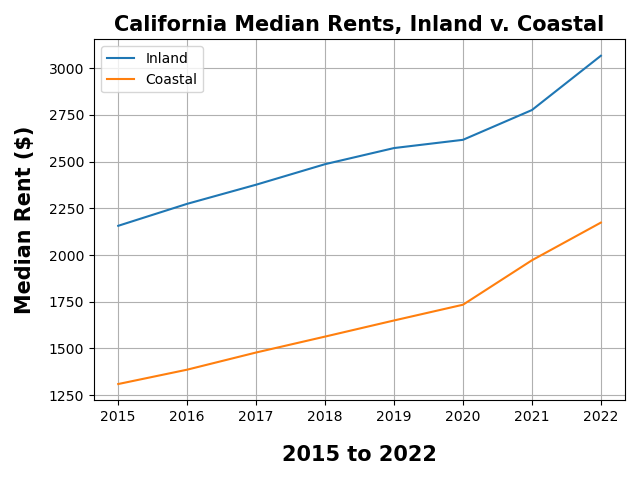

In [16]:
# Create line chart showing change in median rents for coastal vs. inland counties in California for 2015 to 2022

font = {'weight': 'bold', 'size': '15'}
plt.figure(3)
plt.subplot(111)
plt.plot(rents_chart_east_west)
plt.title('California Median Rents, Inland v. Coastal', fontdict= font)
plt.legend(['Inland', 'Coastal'])
plt.xlabel('2015 to 2022', labelpad=15, fontdict= font)
plt.ylabel('Median Rent ($)', labelpad=10, fontdict= font)
plt.grid(x)
plt.tight_layout()
plt.savefig('cal_rents_coast_inland.png')
plt.show()

### California Median Rents, North/Central/South, 2015 to 2022

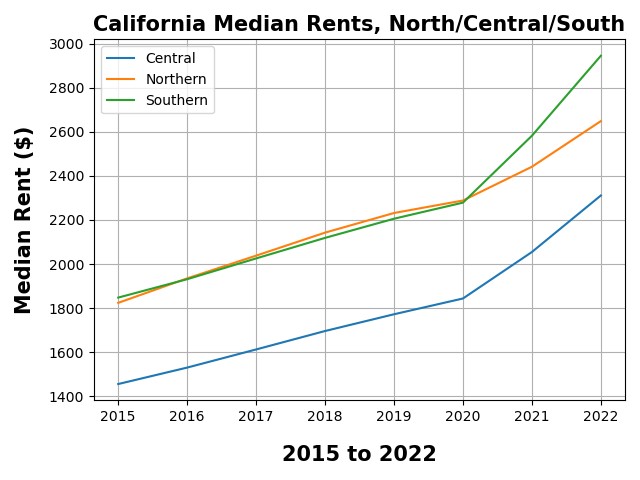

In [17]:
# Create line chart showing change in median rents for Northen vs. Central vs. Southern counties in California for 2015 to 2022

font = {'weight': 'bold', 'size': '15'}
plt.figure(4)
plt.subplot(111)
plt.plot(rents_chart_nor_sou)
plt.title('California Median Rents, North/Central/South', fontdict= font)
plt.legend(['Central', 'Northern', 'Southern'])
plt.xlabel('2015 to 2022', labelpad=15, fontdict= font)
plt.ylabel('Median Rent ($)', labelpad=10, fontdict= font)
plt.grid(x)
plt.tight_layout()
plt.show()